The dataset:
+---------------+------+---------------+-----------------+-------------------------------+---------------+
|    Country    | Year | Literacy Rate | Enrollment Rate | Education Spending (% of GDP) |    Region     |
+---------------+------+---------------+-----------------+-------------------------------+---------------+
|     India     | 2020 |     77.7      |      74.5       |              3.5              |     Asia      |
| United States | 2020 |     99.0      |      88.4       |              5.0              | North America |
|    Brazil     | 2020 |     93.2      |      82.1       |              4.8              | South America |
|    Nigeria    | 2020 |     62.0      |      53.2       |              1.9              |    Africa     |
|    Germany    | 2020 |     99.0      |      95.1       |              4.2              |    Europe     |
|     China     | 2020 |     96.8      |      92.0       |              4.5              |     Asia      |
| South Africa  | 2020 |

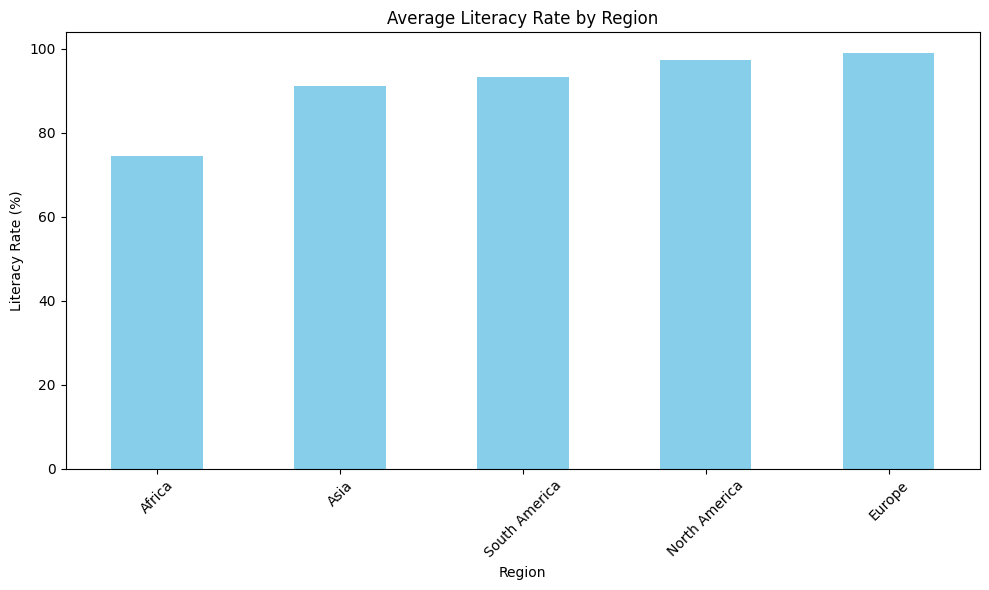

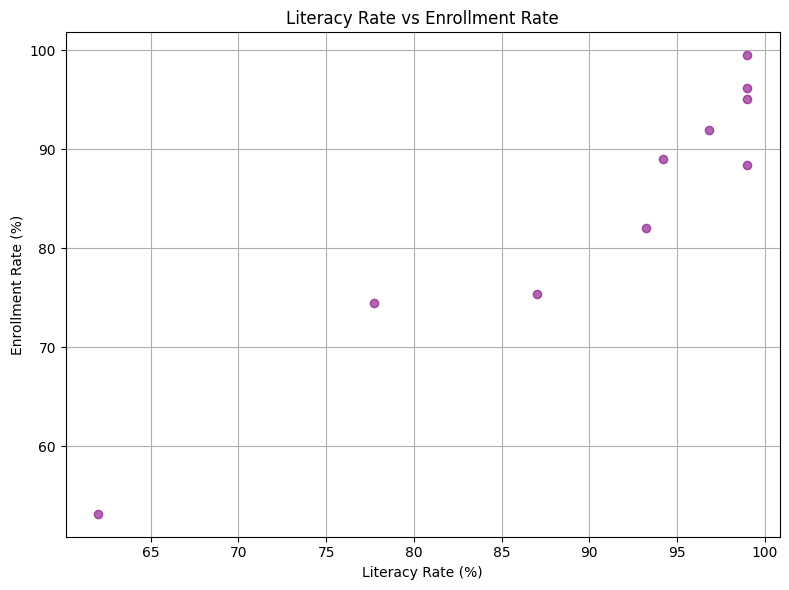

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate


# Step 1: Load the dataset
data = pd.read_csv('education_data (1).csv')

# Step 2: Explore and Clean the Data
print("The dataset:")
pd.set_option('display.width', 100000)  # Increase the display width
pd.set_option('display.max_columns', None)  # Show all columns
print(tabulate(data, headers='keys', tablefmt='pretty', showindex=False))
print(data.head())

# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Fill missing literacy/enrollment rates with mean of the column
data['Literacy Rate'] = data['Literacy Rate'].fillna(data['Literacy Rate'].mean())
data['Enrollment Rate'] = data['Enrollment Rate'].fillna(data['Enrollment Rate'].mean())

# Drop rows where 'Education Spending' is missing
data.dropna(subset=['Education Spending (% of GDP)'], inplace=True)

# Step 3: Global Trends Analysis
# 3.1 Average Literacy Rates by Region
avg_literacy_region = data.groupby('Region')['Literacy Rate'].mean()

# 3.2 Trends in Education Spending over Years
spending_trends = data.groupby('Year')['Education Spending (% of GDP)'].mean()

# 3.3 Correlation between Literacy and Enrollment
correlation = data['Literacy Rate'].corr(data['Enrollment Rate'])
print(f"\nCorrelation between Literacy Rate and Enrollment Rate: {correlation:.2f}")

# Step 4: Visualization
# 4.1 Bar chart for Average Literacy Rate by Region
plt.figure(figsize=(10, 6))
avg_literacy_region.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Literacy Rate by Region')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''
# 4.2 Line chart for Education Spending Trends
plt.figure(figsize=(10, 6))
spending_trends.plot(color='green')
plt.title('Global Education Spending Trends')
plt.ylabel('Education Spending (% of GDP)')
plt.xlabel('Year')
plt.grid()
plt.tight_layout()
plt.show()
'''

# 4.3 Scatter plot: Literacy vs Enrollment Rate
plt.figure(figsize=(8, 6))
plt.scatter(data['Literacy Rate'], data['Enrollment Rate'], alpha=0.6, c='purple')
plt.title('Literacy Rate vs Enrollment Rate')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Enrollment Rate (%)')
plt.grid()
plt.tight_layout()
plt.show()

